In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


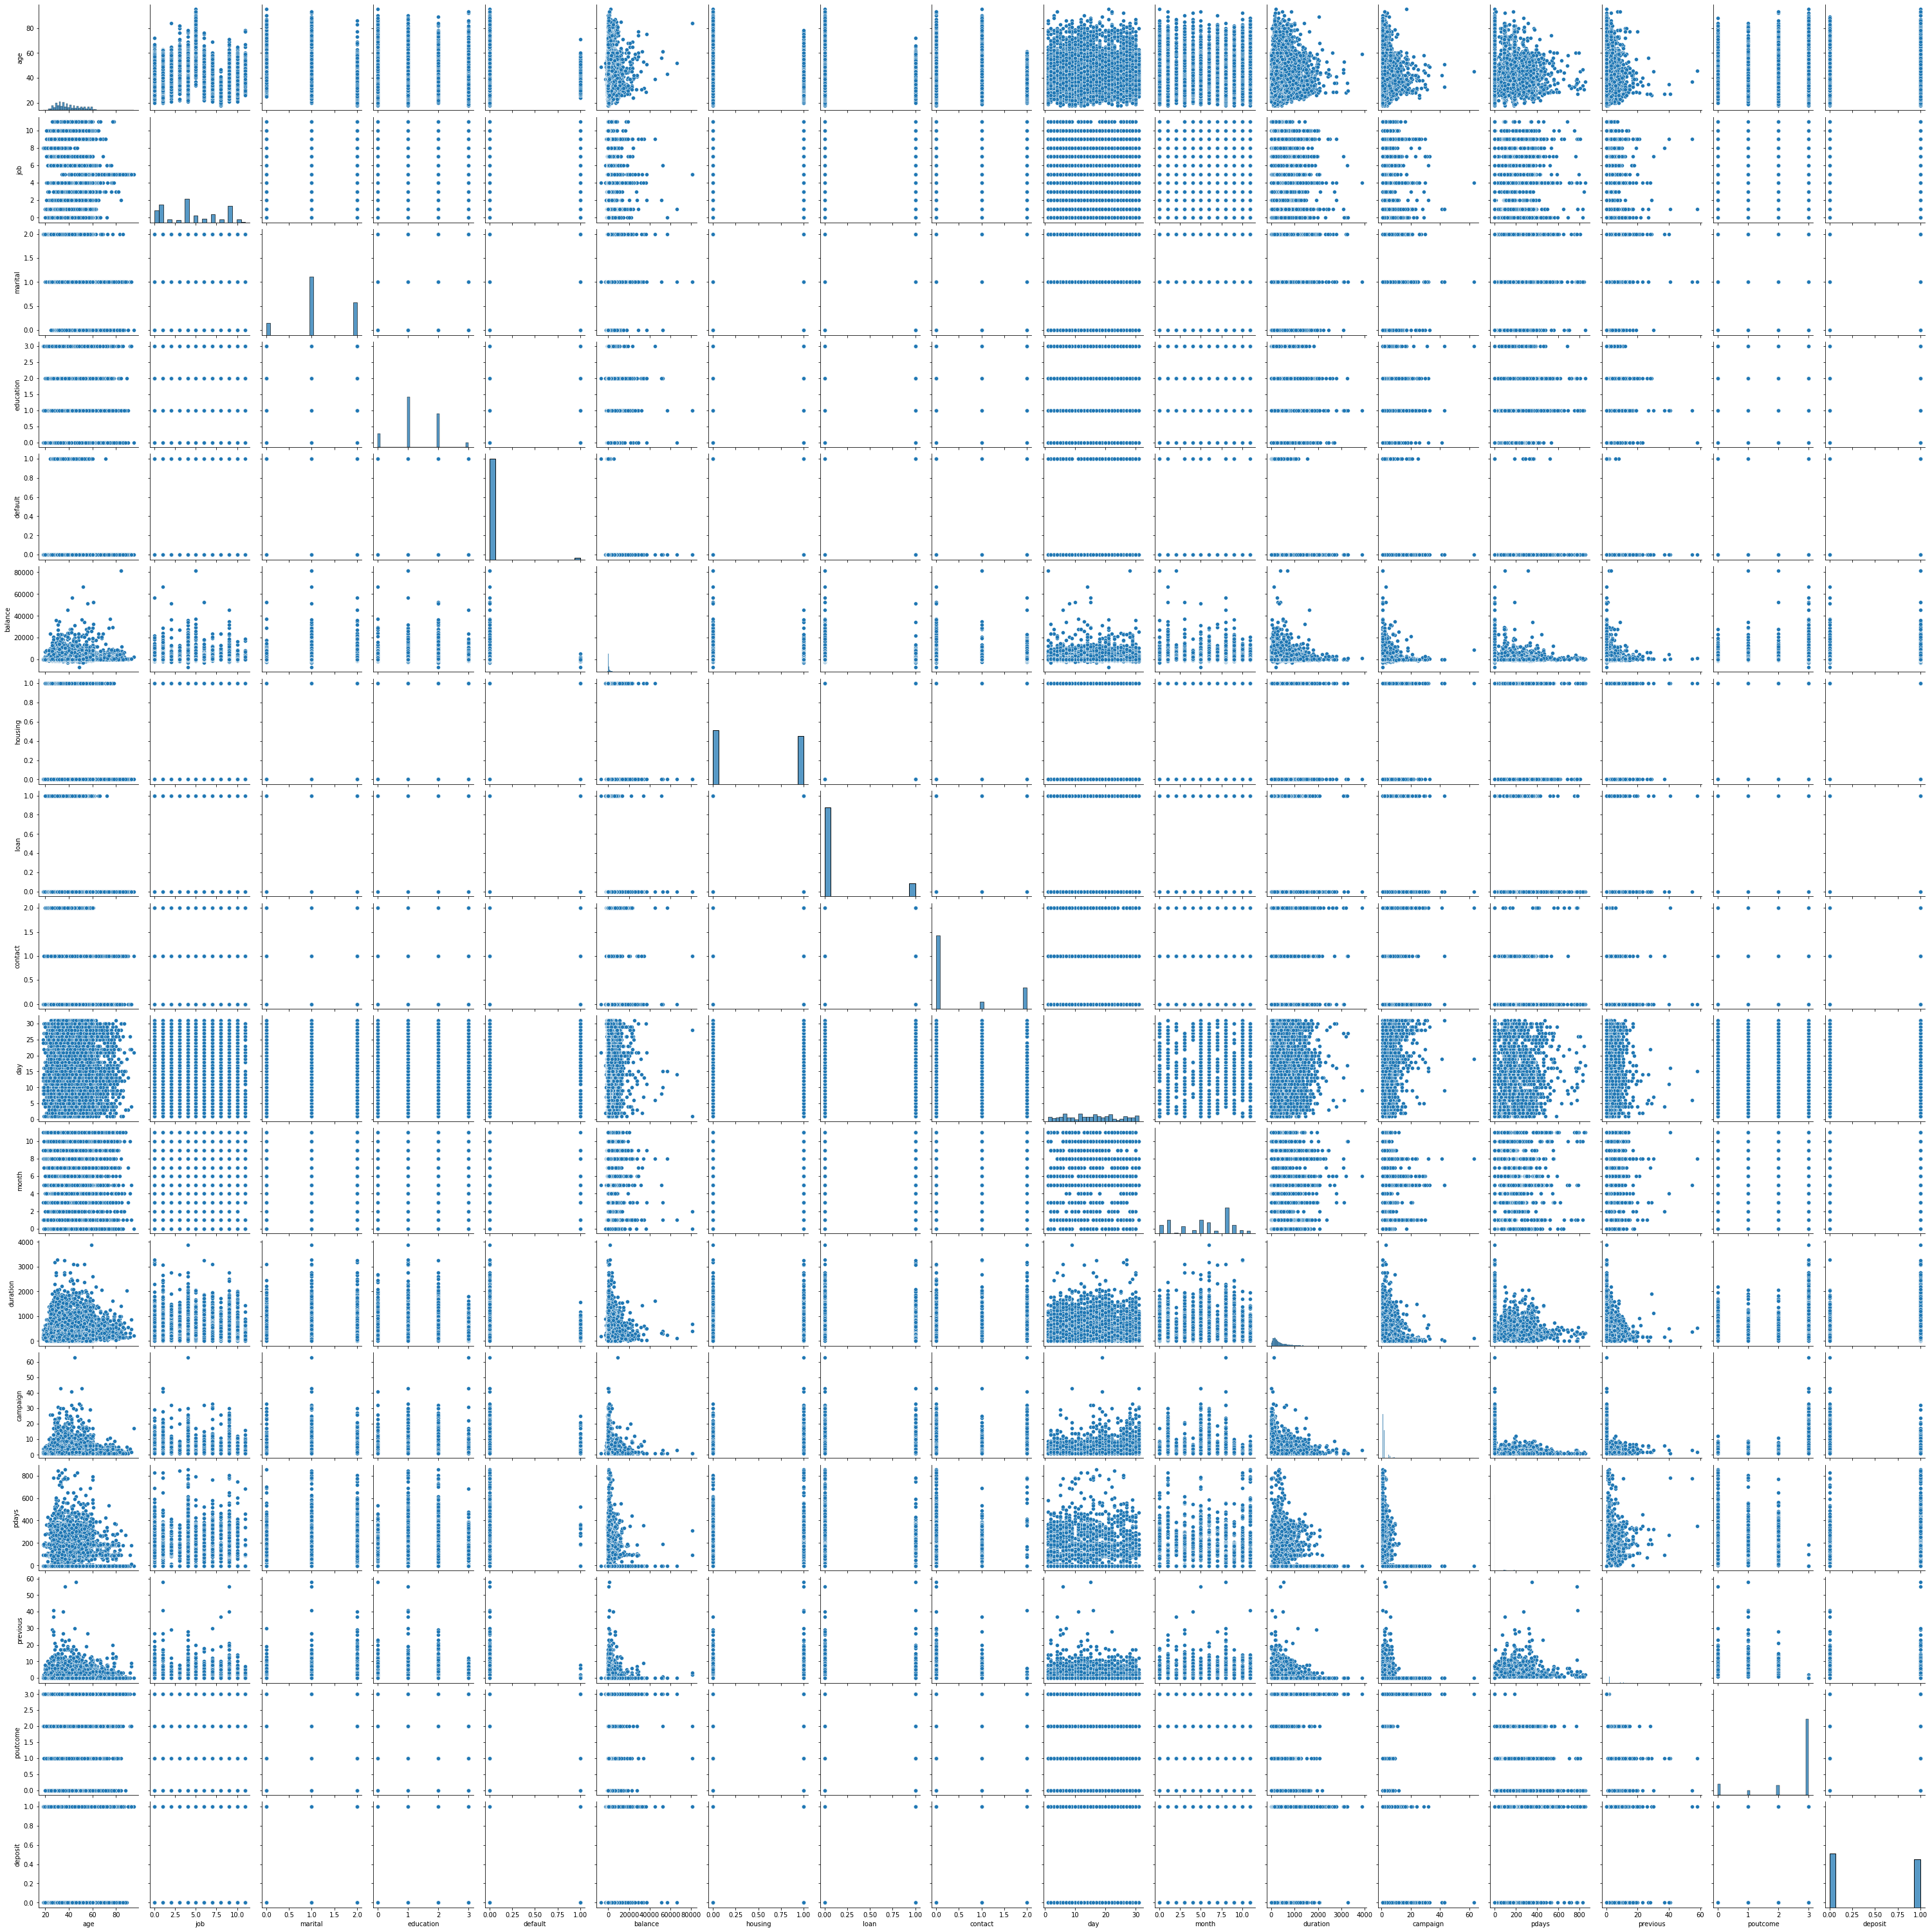

In [23]:
sns.pairplot(df)

In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.metrics import classification_report, accuracy_score

In [10]:
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)

  train = model.score(xtrain, ytrain)
  test = model.score(xtest, ytest)

  print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
  print(classification_report(ytest, ypred))

In [11]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.81889159093818
Testing Accuracy : 0.7539564048969841


              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1760
           1       0.75      0.72      0.74      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [12]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.755535645718674
Testing Accuracy : 0.7659002687369364


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349



In [13]:
svm = mymodel(SVC())

Training Accuracy : 0.7382567515678996
Testing Accuracy : 0.7414153478650344


              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1760
           1       0.78      0.63      0.70      1589

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349



In [14]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.7868020304568528


              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

GridSearchCV

In [17]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1,50,5)),
    "min_samples_leaf": list(range(1,50,5))
}

In [18]:
from sklearn. model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [19]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 31}

In [20]:
grid.best_score_

0.8261899086018467

In [21]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=21, min_samples_leaf=31)

In [22]:
logreg = grid.best_estimator_
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))

Training Accuracy : 0.847561756047613
Testing Accuracy : 0.8262167811286951


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

